In [1]:
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


### Preparing Data

In [2]:
boston = load_boston()
print(boston.keys())
print(boston.data.shape)
print(boston.DESCR)


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
(506, 13)
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radi

c:\python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func:

In [4]:
bos = pd.DataFrame(boston.data)
print(bos.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [5]:
X = bos 
Y = pd.DataFrame(boston.target)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2)

# Standard Scaler

In [14]:
def model_fitting(model, X_train, X_test, y_train, y_test, **kwargs):
    model = model(**kwargs)
    model.fit(X_train, y_train)
    Y_pred = model.predict(X_test)
    plt.scatter(y_test, Y_pred)
    plt.xlabel("Prices: $Y_i$")
    plt.ylabel("Predicted prices: $\hat{Y}_i$")
    plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
    x = np.linspace(y_test.min(), y_test.max(), len(y_test))
    plt.plot(x, x, 'r')
    print("R2 score: ",r2_score(y_test, Y_pred))

R2 score:  0.7690049540948594


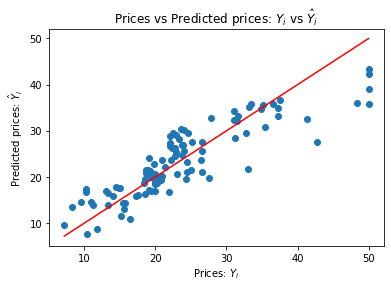

In [15]:
scaler = StandardScaler()
X = scaler.fit_transform(X, Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2)
model_fitting(LinearRegression, X_train, X_test, y_train, y_test)

# Polynomial Regression

R2 score:  0.7391278420768854


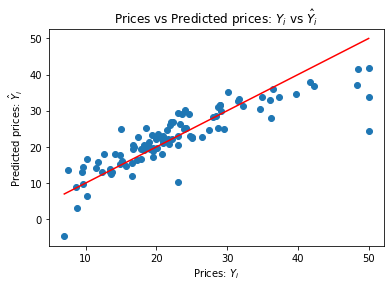

In [17]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X, Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2)
model_fitting(LinearRegression, X_train, X_test, y_train, y_test)

# Regularization Lasso and Ridge

## Lasso

R2 score:  0.6567590086990232


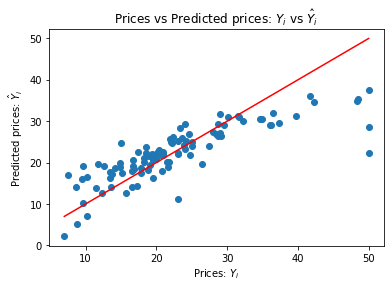

In [18]:
model_fitting(Lasso, X_train, X_test, y_train, y_test)

## Ridge

R2 score:  0.8977217125333821


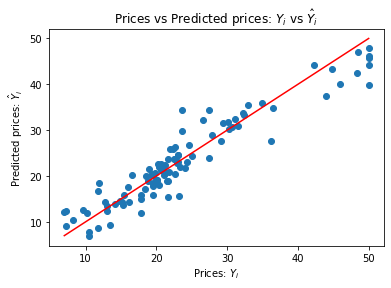

In [20]:
poly_2 = PolynomialFeatures(degree=2)
X_poly_2 = poly_2.fit_transform(X, Y)
X_train, X_test, y_train, y_test = train_test_split(X_poly_2, Y, test_size=.2)
model_fitting(Ridge, X_train, X_test, y_train, y_test)

# Regularization for logistic regression

In [27]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
Y = pd.DataFrame(cancer.target)

In [45]:
for column in X.columns:
    X[column] = X[column].fillna(X[column].mean()) ### filling missing value with mean

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2)